In [1]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import math
import scipy

In [2]:
x = loadmat('C:/Users/rajra/OneDrive/Desktop/books/analysis of neural data/Ch5-ECoG-2')

In [5]:
time = x['t']
t = time[0,:]
e1 = x['x']
e2 = x['y']

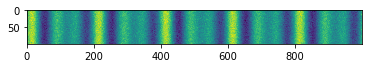

In [6]:
plt.imshow(e1)


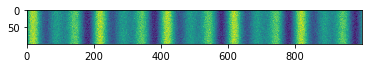

In [7]:
plt.imshow(e2)

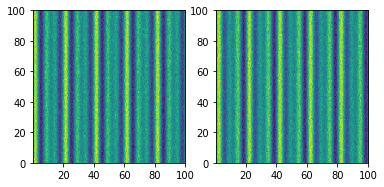

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,10))
ax1.imshow(e1,extent=[min(t)*100, max(t)*100,0, 100] )
ax2.imshow(e2,extent=[min(t)*100, max(t)*100,0, 100] )

In [9]:
def trial_averaged_ac(ecog):
    del_t = t[1] - t[0]
    K = ecog.shape[0]
    nlags = 100
    size = (2*nlags)+1
    ac = [0]*size
    for k in range(K):
        y = ecog[k,:] - np.mean(ecog[k,:])
        lags,ac0,_,_ = plt.acorr(y,maxlags = 100)
        plt.close(1)
        ac = ac + ac0/K
    plt.plot(lags*del_t,ac)

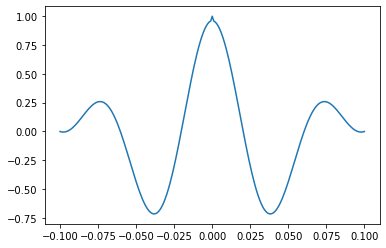

In [11]:
trial_averaged_ac(e1)

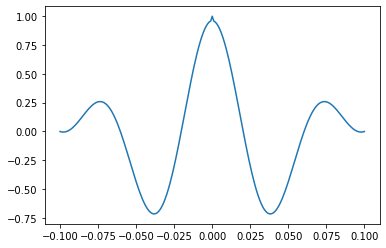

In [12]:
trial_averaged_ac(e2)

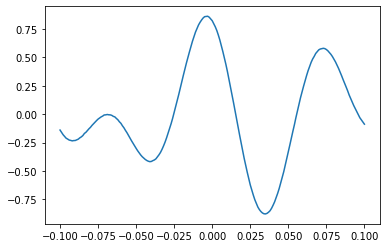

In [13]:
del_t = t[1] - t[0]
lags,ac,_,_ = plt.xcorr(e1[0,:],e2[0,:],maxlags = 100)
plt.close(1)
plt.plot(lags*del_t,ac)

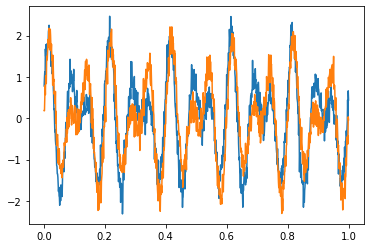

In [14]:
plt.plot(t,e1[0,:])
plt.plot(t,e2[0,:])

In [17]:
def trial_averaged_cc(ecog1,ecog2):
    del_t = t[1] - t[0]
    K = ecog1.shape[0]
    nlags = 100
    size = (2*nlags)+1
    cc = [[]*size for i in range(K)]
    for k in range(K):
        a = ecog1[k,:] - np.mean(ecog1[k,:])
        b = ecog2[k,:] - np.mean(ecog2[k,:])
        lags,cc0,_,_ = plt.xcorr(a,b,maxlags = 100)
        plt.close(1)
        cc[k] = [item for item in cc0]
    xc = np.mean(cc,axis=0)
    plt.plot(lags*del_t,xc)
    #plt.ylim(-0.6,0.6)
    #plt.xlim(-0.2,0.2)

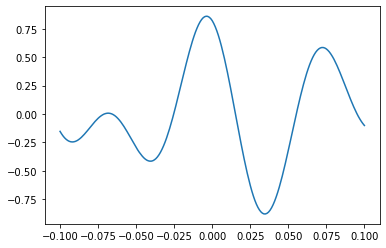

In [18]:
trial_averaged_cc(e1,e2)

In [19]:
def compute_spectra(ecog,t):
    del_t = t[1] - t[0]
    T = len(ecog)*del_t

    xf = np.fft.fft(ecog-np.mean(ecog))
    Sxx = (2*del_t*del_t*xf*np.conj(xf))/T
    N = len(ecog)/2
    Sxx = Sxx[0:int(N)]

    df = 1/(T)
    sampling_f = 1/del_t
    nf = sampling_f/2
    faxis = np.arange(0.0, nf, df)
    plt.plot(faxis,10*np.log10(Sxx/max(Sxx)))

In [20]:
def trial_averaged_Sxx(ecog):
    del_t = t[1] - t[0]
    T = (ecog.shape[1])*del_t
    K = ecog.shape[0]
    N = ecog.shape[1]
    n = N/2
    Sxx = [[]*N for i in range(K)]
    for k in range(K):
        xf = np.fft.fft(ecog[k,:]-np.mean(ecog[k,:]))
        sxx = (2*del_t*del_t*xf*np.conj(xf))/T
        Sxx[k] = [item for item in sxx]
    Sxx = [item[0:int(n)] for item in Sxx]
    Sxx = np.mean(Sxx,axis=0)
    df = 1/(T)
    sampling_f = 1/del_t
    nf = sampling_f/2
    faxis = np.arange(0.0, nf, df)
    plt.plot(faxis,10*np.log10(Sxx/max(Sxx)))
    plt.xlim(0,100)
    plt.ylim(-50,5)

C:\Users\rajra\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rajra\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


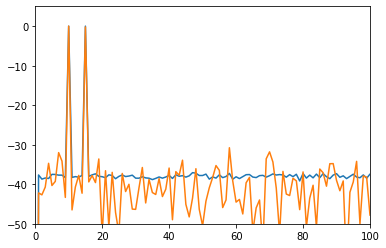

In [22]:
trial_averaged_Sxx(e2)
compute_spectra(e2[0,:],t)

C:\Users\rajra\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


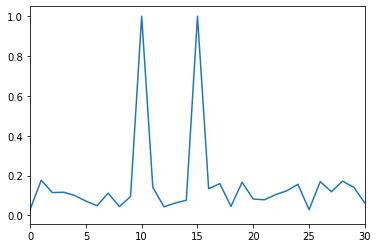

In [25]:
def comp_coherence(ecog1,ecog2):
    del_t = t[1] - t[0]
    T = (ecog1.shape[1])*del_t
    K = ecog1.shape[0]
    N = ecog1.shape[1]
    n = N/2
    
    Sxx = [[]*N for i in range(K)]
    Syy = [[]*N for i in range(K)]
    Sxy = [[]*N for i in range(K)]
    
    for k in range(K):
        x_0 = ecog1[k,:]-np.mean(ecog1[k,:]) 
        y_0 = ecog2[k,:]-np.mean(ecog2[k,:]) 
        
        xf = np.fft.fft(x_0)
        yf = np.fft.fft(y_0)
        
        sxx = (2*del_t*del_t*xf*np.conj(xf))/T
        Sxx[k] = [item for item in sxx]
        
        syy = (2*del_t*del_t*yf*np.conj(yf))/T
        Syy[k] = [item for item in syy]
        
        sxy = (2*del_t*del_t*xf*np.conj(yf))/T
        Sxy[k] = [item for item in sxy]
        
    Sxx = [item[0:int(n)] for item in Sxx]
    Syy = [item[0:int(n)] for item in Syy]
    Sxy = [item[0:int(n)] for item in Sxy]
    
    Sxx = np.mean(Sxx,axis=0)
    Syy = np.mean(Syy,axis=0)
    Sxy = np.mean(Sxy,axis=0)
    
    num = abs(Sxy)
    den = np.multiply(np.sqrt(Sxx),np.sqrt(Syy))
    coherence = np.divide(num,den)
    
    df = 1/(T)
    sampling_f = 1/del_t
    nf = sampling_f/2
    faxis = np.arange(0.0, nf, df)
    plt.plot(faxis,coherence)
    plt.xlim(0,30)
    
    
comp_coherence(e1,e2)
    
    
    

C:\Users\rajra\anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


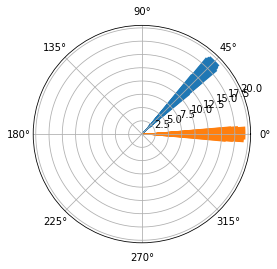

In [26]:
def vis_phase_diff(ecog1,ecog2):
    del_t = t[1] - t[0]
    T = (ecog1.shape[1])*del_t
    K = ecog1.shape[0]
    N = ecog1.shape[1]
    n = N/2
    
    df = 1/(T)
    sampling_f = 1/del_t
    nf = sampling_f/2
    faxis = np.arange(0.0, nf, df)
    
    j8 = faxis.tolist().index(10)
    j24 = faxis.tolist().index(15) 
    
    phi8 = [0]*K
    phi24 = [0]*K
    
    for k in range(K):
        x_0 = ecog1[k,:]-np.mean(ecog1[k,:]) 
        y_0 = ecog2[k,:]-np.mean(ecog2[k,:]) 
        
        xf = np.fft.fft(x_0)
        yf = np.fft.fft(y_0)
        
        sxy = (2*del_t*del_t*xf*np.conj(yf))/T
        phi8[k] = np.angle(sxy[j8])
        phi24[k] = np.angle(sxy[j24])
        
    width = (2*np.pi) / 50
    radii =  20*np.random.rand(K)
    bottom = 0
    
    plt.subplot(111, projection='polar')
    plt.bar(phi8, radii, width=width, bottom=bottom)
    
    plt.subplot(111, projection='polar')
    plt.bar(phi24, radii, width=width, bottom=bottom)

    
vis_phase_diff(e1,e2)
        
    
    

24